<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий для IT-специалистов из HeadHunter
   

# Юнит 1. Этапы

* знакомство с данными;
* предварительный анализ данных;
* детальный анализ вакансий;
* анализ работодателей;
* предметный анализ.

In [210]:
# !pip install psycopg2 - для работы в Python: отправка запросов в PostgreSQL и получение ответа
# !pip install configparser - для поиска .ini файла
# !pip install -U kaleido - для сохранения интерактивной картинки графиков Plotly
# !pip install beautifulsoup4

import pandas as pd
import psycopg2
import plotly.express as px
import requests

from configparser import ConfigParser
from bs4 import BeautifulSoup

In [211]:
"""Скрываем пароль и логин от БД для выгрузки в git
Создаем переменную config и urlsconf, в которой будет храниться адрес до файла .ini
"""

urlsconf = 'config/config.ini'
config = ConfigParser()

config.read(urlsconf) 

['config/config.ini']

In [212]:
DBNAME = config['login_db']['DBNAME']
USER = config['login_db']['USER']
PASSWORD = config['login_db']['PASSWORD']
HOST = config['tg_bot']['HOST']
PORT = config['tg_bot']['PORT']

In [213]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 2. Знакомство с данными

5 таблиц:
* VACANCIES
* AREAS
* EMPLOYERS
* INDUSTRIES
* EMPLOYERS_INDUSTRIES

**Таблица 1. VACANCIES содержит данные по вакансиям для IT-специалистов**

10 параметров: название вакансии, ключевые навыки, тип рабочего графика, требования к опыту, тип трудоустройства, зарплата, ID региона вакансии, ID работодателя и пр.

In [214]:
"""Код запроса представляет из себя строковую переменную (f-строка)
Используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма.
Выводим полную БД. Необходима для последующего анализа.
"""
query_2_1 = f'''select *
           from public.vacancies
            '''
            
vacancies_df = pd.read_sql_query(query_2_1, connection)
vacancies_df

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740
...,...,...,...,...,...,...,...,...,...,...
49192,55589514,Специалист по информационным технологиям,Электронный документооборот\t1С: Предприятие 8...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,66,5109332
49193,55029668,Руководитель процессного офиса,Оптимизация бизнес-процессов\tСтратегическое м...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,26,51333
49194,66172263,Начальник сервисной службы,Организаторские навыки\tУправление персоналом\...,Полный день,От 1 года до 3 лет,Полная занятость,60000.0,NaN,1930,4094700
49195,66180086,Senior IOS разработчик,Swift\tRealm\tiOS\tАнглийский язык\tMVP\tMVVM\...,Полный день,От 1 года до 3 лет,Полная занятость,146456.0,244094.0,160,4469939


**Таблица 2. AREAS - таблица-справочник, которая хранит код города и его название.**

In [144]:
query_2_2 = f'''select *
           from public.areas
           limit 5
            '''
            
areas_df_part = pd.read_sql_query(query_2_2, connection)
areas_df_part

,id,name
0,2758,Тбилиси
1,8,Майкоп
2,1180,Нерюнгри
3,1240,Новокузнецк
4,2,Санкт-Петербург


**Таблица 3. EMPLOYERS - таблица-справочник со списком работодателей.**

In [145]:
query_2_3 = f'''select *
           from public.employers
           limit 5
            '''
            
employers_df_part = pd.read_sql_query(query_2_3, connection)
employers_df_part

,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88


**Таблица 4. INDUSTRIES - таблица-справочник вариантов сфер деятельности работодателей.**

In [146]:
query_2_4 = f'''select *
           from public.industries
           limit 5
            '''
            
industries_df_part = pd.read_sql_query(query_2_4, connection)
industries_df_part

,id,name
0,7.540,Разработка программного обеспечения
1,7.539,"Системная интеграция, автоматизации технологи..."
2,27.550,Безалкогольные напитки (производство)
3,27.551,"Безалкогольные напитки (продвижение, оптовая т..."
4,13.664,Управление и эксплуатация недвижимости


**Таблица 5. EMPLOYERS_INDUSTRIES - дополнительная таблица, которая существует для организации связи между работодателями и сферами их деятельности.**

In [147]:
query_2_5 = f'''select *
           from public.employers_industries
           limit 5
            '''
            
emp_ind_df_part = pd.read_sql_query(query_2_5, connection)
emp_ind_df_part

,employer_id,industry_id
0,2393,7.540
1,2393,7.539
2,72977,7.540
3,72977,7.539
4,3155,27.550


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [148]:
query_3_1 = f'''select count(*) cnt
           from public.vacancies
            '''

In [149]:
df = pd.read_sql_query(query_3_1, connection)
df

,cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [150]:
query_3_2 = f'''select count(*) cnt
           from public.employers
            '''

In [151]:
df = pd.read_sql_query(query_3_2, connection)
df

,cnt
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица areas).

In [152]:
query_3_3 = f'''select count(id) cnt
           from public.areas
        '''

In [153]:
df = pd.read_sql_query(query_3_3, connection)
df

,cnt
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица industries).

In [154]:
query_3_4 = f'''select count(*) cnt
           from public.industries
        '''

In [155]:
df = pd.read_sql_query(query_3_4, connection)
df

,cnt
0,294


***

### Выводы по Предварительному анализу данных
По предварительному анализу данных мы получили следующие значения:
* в таблице VACANCIES представлена информация о 49197 вакансиях;
* в таблице EMPLOYERS указаны 23501 работодатель;
* в таблице AREAS - 1362 наименования;
* в таблице INDUSTRIES указаны 294 сферы деятельности.

На основании полученных данных можно сделать следующие выводы:
- На каждого работодателя приходится около 2 вакансий (кол-во вакансий/ кол-во работодателей). Однако, как мы увидим далее, данные выводы будут НЕ верны:
    * у 6 работодателей указано более 300 вакансий (~2000 у "Яндекс") - это порядка 8% от всех вакансий в БД,
    * ~17% (8544) работодателей предлагают 1 вакансию.
- IT-специалисты требуются в 294 сферах деятельности. IT может являться ключевой деятельностью компании либо отвечать за решение отдельных задач.
Даже при поверхностном просмотре позиций по вакансиям есть такие профессии, как "корректор", "продюсер" и пр. Вероятно, ключевым критерием при выгрузке данных могла быть обозначена сфера деятельности компании (связана с IT или нет), а не соответствие ключевых слов IT-области в названии вакансии. Возможно, этот момент требует более детального анализа.
- Вакансии представлены для 1362 географических областей. Здесь присутствуют как названия населенных пунктов / городов, так и стран. Вероятно, впоследствии лучше попробовать объединить вакансии по странам (вручную?).

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [156]:
query_4_1 = f'''select count(vac.id) "cnt", areas.name "area"
           from public.vacancies vac
           join public.areas on areas.id = vac.area_id
           group by areas.name
           order by cnt desc
        '''
# Варианты написания alias: "cnt" / vac.
# Можно добавить в SQL-запрос последнюю строчку LIMIT для вывода ТОП-5

In [157]:
df = pd.read_sql_query(query_4_1, connection)
df
# В df получено 769 записей, или 769 уникальных наименований геогр.областей. Для 44% геогр.областей вакансии не указаны.

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [158]:
query_4_2 = f'''select count(*) cnt
           from public.vacancies
           where salary_from IS NOT NULL
           or salary_to IS NOT NULL
        '''

In [159]:
df = pd.read_sql_query(query_4_2, connection)
df

,cnt
0,24073


In [160]:
# Количество вакансий с наличием/ отсутствием значений зарплаты в соответствии с опытом кандидата
query_4_2_1 = f'''(select count(experience) cnt, experience, 'Указан' salary_information
           from public.vacancies
           where salary_from is NULL and salary_from is NULL
           group by experience)
           union all
           (select count(experience) cnt, experience,'Не указан'
           from public.vacancies
           where salary_from is not NULL and salary_from is not NULL
           group by experience)
           order by cnt desc
        '''

In [161]:
df = pd.read_sql_query(query_4_2_1, connection)
df

,cnt,experience,salary_information
0,14757,От 1 года до 3 лет,Указан
1,11395,От 1 года до 3 лет,Не указан
2,9585,От 3 до 6 лет,Указан
3,4926,От 3 до 6 лет,Не указан
4,4655,Нет опыта,Не указан
5,2542,Нет опыта,Указан
6,828,Более 6 лет,Указан
7,509,Более 6 лет,Не указан


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [162]:
query_4_3 = f'''select avg(salary_from) lower_bound, avg(salary_to) upper_bound
           from public.vacancies
        '''

In [163]:
df = pd.read_sql_query(query_4_3, connection)
round(df)

,lower_bound,upper_bound
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.

In [164]:
query_4_4 = f'''select count(id) cnt, schedule, employment
           from public.vacancies
           group by schedule, employment
           order by cnt desc
        '''

In [165]:
df = pd.read_sql_query(query_4_4, connection)
df

,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [166]:
query_4_5 = f'''select count(id) cnt, experience
           from public.vacancies
           group by experience
           order by cnt
        '''

In [167]:
df = pd.read_sql_query(query_4_5, connection)
df

,cnt,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


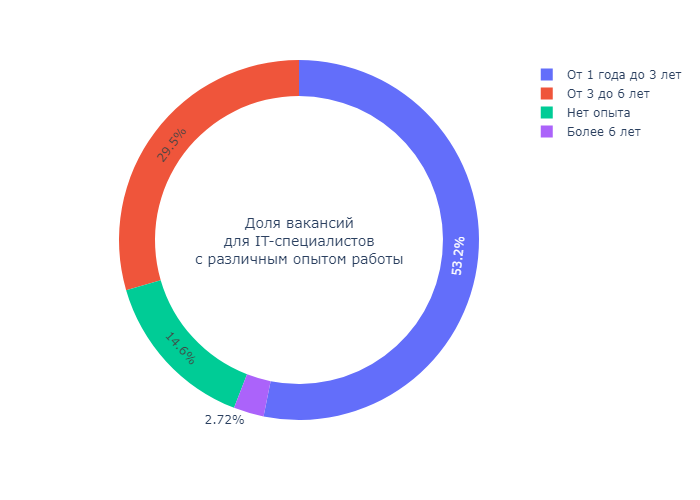

In [168]:
"""
Группируем данные по категории "Опыт" (Experience)
Проводим расчет количества вакансий по соответствующим группам ("Нет опыта" ... "Более 6 лет")
В результате получаем объект данных типа Series
Строим график - Круговая диаграмма
"""
pie_data = vacancies_df.groupby('experience')['id'].count()
pie_data.index = ['Более 6 лет', 'Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет']

# визуализация систем координат (Plotly)
fig = px.pie(
    values=pie_data,
    names=pie_data.index,
    hole=0.8
)
fig.update_layout(
    annotations=[dict(text='Доля вакансий<br>для IT-специалистов<br>с различным опытом работы', x=0.5, y=0.5, font_size=14, showarrow=False)])

fig.show('png')
# fig.show()

***

### Выводы по Анализу вакансий
1) ТОП-5 городов по количеству вакансий для IT-специалистов в представленной базе данных (БД):
* Москва
* Санкт-Петербург
* Минск
* Новосибирск
* Алматы

В БД представлены вакансии как в России, так и в других странах (Республика Беларусь, Казахстан и пр.).
В нижних позициях отмечены города с населением до 100 тыс. (или до 50 тыс.). Можем предположить, что свободные вакансии в городах с населением более 1 млн встречаются чаще. Здесь же больше спрос на IT-специалистов.

2) Всего указано 49197 вакансий. У половины записей отсутствует информация о зарплатной вилке. В основном для соискателей с опытом работы от 1 года и до 3 лет.
Возможные причины того, почему работодатель не раскрывает зарплату:
* зарплата зависит от уровня кандидата,
* внутренние правила компании (неразглашение информации о ЗП),
* не определен объем работы (будет известно после встречи с кандидатом).

3) Среднее значение минимальной границы заработной платы находится на уровне 71 тыс. руб., а максимальная около 111 тыс.руб. Как указано ниже, большая часть вакансий для соискателей с опытом работы "от 1 года и до 3 лет" (более 50%). Для более глубокого анализа, конечно, можно изучить для каких профессий соответствует тот или иной средний уровень ЗП. При необходимости можно заполнить пропуски при условии, что будут схожи характеристики вакансий (сфера деятельности работодателя, опыт работы соискателя, регион, профессия и пр.)

4) При найме IT-специалистов на Полную занятость чаше встречаются вакансии с графиком работы на полный день (72% записей) или удаленный формат (~16%). Наименьшей популярностью пользуется формат проектной работы со сменным графиком или вахтовым методом (для инженеров).

5) В БД более 50% вакансий для соискателей с опытом работы от 1 года и до 3 лет;
- 30% вакансий - для соискателей с опытом работы от 3 до 6 лет;
- ~15% - для соискателей без опыта;
- ~3% - для IT-специалистов с опытом работы более 6 лет.

Данное распределение говорит о том, что:
* есть спрос на специалистов с опытом работы по данному направлению (не менее 1 года),
* вероятно, в компаниях есть множество задач, требующих специальных знаний, но не требующих нетривиального подхода в решении. Что чаще оценивается при найме специалистов на уровень Senior. Возможно также, что не для всех компаний IT-специалисты являются ключевыми.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [169]:
query_5_1 = f'''select count(vac.id) cnt, emp.name
           from public.vacancies vac
           join public.employers emp on emp.id = vac.employer_id
           group by emp.name
           order by cnt desc
           limit 5
        '''

In [170]:
df = pd.read_sql_query(query_5_1, connection)
df

,cnt,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть


In [171]:
# Список компаний, которые предлагают 300 и более вакансий для IT-специалистов
query_5_1_1 = f'''select count(vac.id) cnt, emp.name
           from public.vacancies vac
           join public.employers emp on emp.id = vac.employer_id
           group by emp.name
           having count(vac.id) >= 300
           order by cnt desc
        '''

In [172]:
df = pd.read_sql_query(query_5_1_1, connection)
df

,cnt,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть
5,327,ИК СИБИНТЕК


In [173]:
# Список компаний, которые предлагают 1 вакансию для IT-специалистов
query_5_1_2 = f'''select count(vac.id) cnt, emp.name
           from public.vacancies vac
           join public.employers emp on emp.id = vac.employer_id
           group by emp.name
           having count(vac.id) = 1
           order by cnt desc
        '''

In [174]:
df = pd.read_sql_query(query_5_1_2, connection)
df

,cnt,name
0,1,Торговый дом Аскания
1,1,Тойота Центр Омск / Лексус Омск
2,1,ФПГ Энергоконтракт
3,1,Svetek
4,1,Ульяновскцентргаз
...,...,...
8539,1,АПРИ Флай Плэнинг
8540,1,Учебный Центр Развитие
8541,1,ГБУЗ Городская поликлиника №2 г. Сочи Министер...
8542,1,iAGE


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.

In [175]:
query_5_2 = f'''select areas.name area_name, count(emp.id) cnt_employer, count(vac.id) cnt_vacancies
           from public.areas
           left join public.vacancies vac on areas.id = vac.area_id
           left join public.employers emp on emp.area = areas.id
           group by area_name
           having count(vac.id) = 0
           order by cnt_employer desc
        '''

In [176]:
df = pd.read_sql_query(query_5_2, connection)
df

,area_name,cnt_employer,cnt_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.

In [177]:
"""Необходимо количество неповторяющихся кодов area, поэтому используем distinct в расчетах
Необходимо присоединить только те записи, которые удовлетворяют условию, поэтому используем left join
Условие: только те записи (регионы), где опубликованы вакансии у соответствующих работодателей
"""
query_5_3 = f'''select emp.name emp_name, count(distinct vac.area_id) cnt_area
           from public.employers emp
           left join public.vacancies vac on vac.employer_id = emp.id
           where vac.id is not null
           group by emp_name
           order by cnt_area desc
        '''

In [178]:
df = pd.read_sql_query(query_5_3, connection)
df

,emp_name,cnt_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


In [179]:
# Количество регионов, где "Яндекс" предлагает вакансии с удаленным форматом работы при полной занятости
query_5_3_1 = f'''select emp.name emp_name, count(distinct vac.area_id) cnt_area, employment, schedule
           from public.employers emp
           left join public.vacancies vac on vac.employer_id = emp.id
           where vac.id is not null
           and emp.name = 'Яндекс'
           and schedule = 'Удаленная работа'
           group by emp_name, employment, schedule
        '''

In [180]:
df = pd.read_sql_query(query_5_3_1, connection)
df

,emp_name,cnt_area,employment,schedule
0,Яндекс,173,Полная занятость,Удаленная работа
1,Яндекс,175,Частичная занятость,Удаленная работа


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [181]:
query_5_4 = f'''select count(emp.id) cnt
           from public.employers emp
           left join public.employers_industries emp_ind on emp_ind.employer_id = emp.id
           where emp_ind.industry_id is null
        '''

In [182]:
df = pd.read_sql_query(query_5_4, connection)
df

,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [183]:
query_5_5 = f'''select emp.name emp_name
           from public.employers emp
           left join public.employers_industries emp_ind on emp_ind.employer_id = emp.id
           group by emp_name
           having count(emp_ind.employer_id) = 4
           order by emp_name
           offset 2 limit 1
        '''

In [184]:
df = pd.read_sql_query(query_5_5, connection)
df

,emp_name
0,2ГИС


In [185]:
# Количество сфер деятельности, которые указывают компании
query_5_5_1 = f'''select max(cnt_of_field), min(cnt_of_field)
           from(
           select emp.name emp_name, count(emp_ind.employer_id) cnt_of_field
           from public.employers emp
           join public.employers_industries emp_ind on emp_ind.employer_id = emp.id
           group by emp_name
           order by cnt_of_field desc) as x
        '''

In [186]:
df = pd.read_sql_query(query_5_5_1, connection)
df

,max,min
0,16,1


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.

In [187]:
query_5_6 = f'''select count(emp.id) cnt
           from public.employers emp
           left join public.employers_industries emp_ind on emp_ind.employer_id = emp.id
           left join public.industries ind on ind.id = emp_ind.industry_id
           where ind.name = 'Разработка программного обеспечения'
        '''

In [188]:
df = pd.read_sql_query(query_5_6, connection)
df

,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионеров, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-миллионеров надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

In [237]:
""" Чтение html-файла и поиск нужной таблицы.
Корректировка значений в таблице (название города).
Заполнение списка с названиями городов-миллионеров (по численности населения).
"""
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
tables = pd.read_html(url)
temp_table = tables[1]

tables_of_big_city = temp_table[['Город', 'Население, тыс. чел. (итоги переписи 2021 года)[5]']]

tables_of_big_city = tables_of_big_city.replace({'Город': {'Воронеж[a]': 'Воронеж'}})

list_of_big_city = []

for city in tables_of_big_city['Город']:
    list_of_big_city.append(city)
    
print(list_of_big_city)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград']


In [190]:
"""Используем left join для присоединения столбцов из других таблиц по заданному условию (3 условия)
Объединяем таблицы: город и количество вакансий + общее количество вакансий в городах-миллионерах
"""

query_5_7 = f'''select areas.name area_name, count(*) cnt_of_vac
           from public.vacancies vac
           left join public.employers emp on emp.id = vac.employer_id
           left join public.areas on areas.id = vac.area_id
           where emp.name = 'Яндекс'
           and vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
           'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа',
           'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
           group by area_name
           union all
           select 'Total', count(*) cnt_of_vac
           from public.vacancies vac
           left join public.employers emp on emp.id = vac.employer_id
           left join public.areas on areas.id = vac.area_id
           where emp.name = 'Яндекс'
           and vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
           'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа',
           'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
           order by cnt_of_vac
        '''

In [191]:
df = pd.read_sql_query(query_5_7, connection)
df

,area_name,cnt_of_vac
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


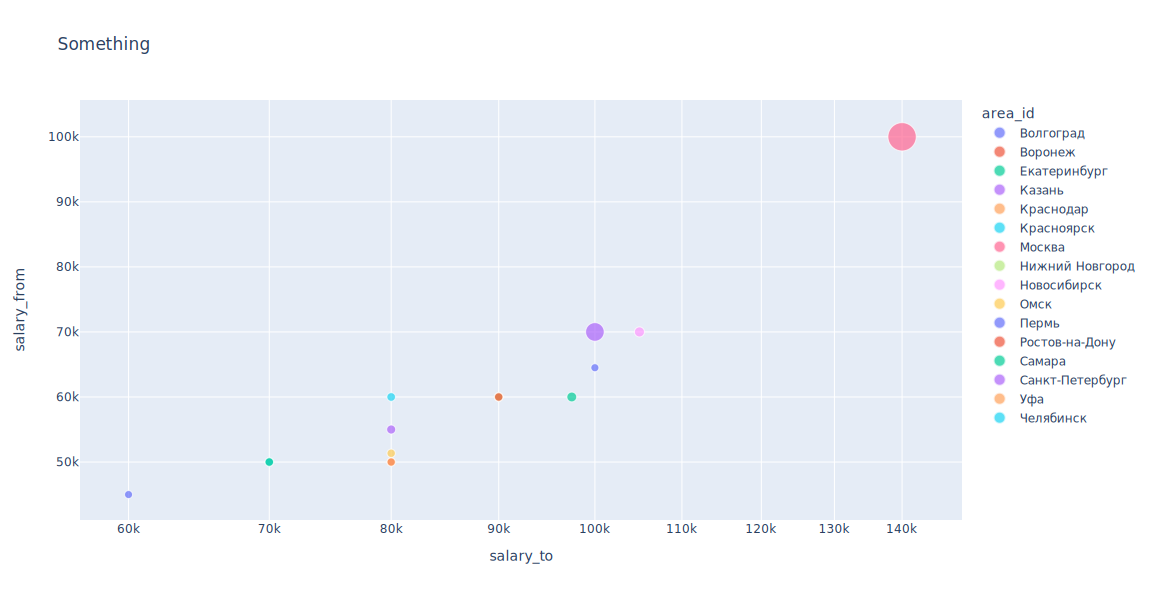

In [239]:
"""Исследование Взаимосвязи медианного уровня ЗП от численности населения в городах-миллионниках.
Способ визуализации данных - Диаграмма рассеяния. Библиотека Plotly.
"""
pd.options.mode.chained_assignment = None # убираем вывод предупреждения SettingWithCopyWarning

# Получение df с наименованием города-миллионника и соответствующим ему кодом (при наличии информации о вакансии)
query_5_7_1 = f'''select distinct areas.name area_name, areas.id area_id
           from public.vacancies vac
           left join public.areas on areas.id = vac.area_id
           where vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
           'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа',
           'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')
           order by area_id
        '''
        
df_5_7_1 = pd.read_sql_query(query_5_7_1, connection)

# Создание словаря: ключ - id, значение - название города-миллионника
mil_city = dict(zip(df_5_7_1.area_id, df_5_7_1.area_name))

# Создание временного списка с численностью (перевод object -> int; замена пропусков)
temp_data = []

for i in tables_of_big_city['Население, тыс. чел. (итоги переписи 2021 года)[5]']:
        i = i.replace(' ', '')
        temp_data.append(int(i)*1000)

# Создание словаря: ключ - город, значение - численность
city_population = dict(zip(tables_of_big_city['Город'], temp_data))

# Создание временного дата-фрейма с записями соответствующими условию (код города = код из словаря mil_city)
# Обращение к дата-фрейму через лямбда-функцию (по конкретному столбцу).
# Изначально планировала построить график по данным компании "Яндекс".
# Однако у "Яндекс" много пропущенных значений по вилке ЗП -> нерепрезентативная выборка
# код для "Яндекс": temp_df = vacancies_df[lambda x: (x['area_id'].isin(list(mil_city.keys()))) & (x['employer_id'] == 1740)]
temp_df = vacancies_df[lambda x: x['area_id'].isin(list(mil_city.keys()))]

# Создание и добавление столбцов в соответствии со значениями столбца area_id:
# 1) замена кода города на название в соответствии с ключом из словаря mil_city,
# 2) добавление столбца с Численностью населения
temp_df.loc[:, ['area_id']] = temp_df.area_id.map(mil_city)
temp_df.loc[:, ['population']] = temp_df.area_id.map(city_population)

# Группируем по столбцу area_id (index), аггрегируем по 3-м параметрам, используя функцию расчета медианного значения.
# Добавляем столбец с численностью населения
plot_data = temp_df.groupby(['area_id']).agg({'salary_from':'median', 'salary_to':'median', 'population': lambda x: x.values[0]})

# визуализация систем координат
fig = px.scatter(
        plot_data.reset_index(), # сброс текущего индекса (название города) и создание индекса по умолчанию
        x='salary_to',
        y='salary_from',
        color='area_id',
        size='population',
        title='Something',
        log_x=True
)

fig.update_layout(width=1150, height=600)

fig.show('svg');
# fig.show();

## Комментарии
По графику можно проследить тенденцию: чем больше нижняя граница уровня ЗП, тем выше значение верхней границы. При этом разница медианных значений двух границ варьируется от 15 до 40 тыс.руб.

*Важно принять во внимание отсутствие данных по ЗП для кандидатов с различным опытом работы (более 3х лет)*

По мере увеличения численности населения растет и уровень ЗП. Это можно объяснить фактором конкуренции между компаниями за лучших специалистов. Важный момент: экономическая ситуация в области, ключевые виды деятельности и пр.

***

### Выводы по Анализу работодателей
1) ТОП-5 компаний по количеству вакансий для IT-специалистов:

* Яндекс (информационные технологии)
* Ростелеком (провайдер цифровых услуг и сервисов)
* Тинькофф (коммерческий онлайн-банк)
* СБЕР (банк)
* Газпром нефть (нефтяная компания)

Все компании являются российскими, точнее соответствуют тому региону, где представлены вакансии [нет Google, к примеру] (следует уточнить, период выгрузки вакансий*). Первое место занимает "Яндекс", что соответствует и отрасли компании.

2) В "России" наибольшее количество работодателей, у которых НЕ отмечены вакансии. Хотя корректнее сказать, что работодателей, которые отметили в качестве зоны поиска кандидатов "Россию", больше, чем остальных. Здесь следует предложить работодателям указывать конкретную область / населенный пункт. Так как соискатели часто отмечают географию поиска конкретно, а не по странам.

3) Рассмотрим географию поиска кандидатов компаниями ТОП-5 из п.1.
- "Яндекс" ищет сотрудников в 181 населенном пункте;
- "Ростелеком" - в 152;
- "Тинькофф" - в 43;
- "СБЕР" - в 24;
- "Газпром нефть" - в 24.

Широта географии поиска объясняется тем, что данные компании предлагают соискателям удаленный формат работы при условии полной занятости (пример компании "Яндекс" в п.5_3_1). Чем более гибка политика компании по переходу к удаленному формату, тем шире возможности работодателя по поиску талантливых кандидатов. Однако подобный формат может быть приемлем для компаний, развивающихся в области IT-технологий, где они являются ключевыми.

4) Около 36% работодателей НЕ указывают сферу деятельности. Для определения причины можно провести дополнительный анализ. Но лучше оставить в качестве рекомендации для работодателей: "Указывайте сферу деятельности компании для упрощения поиска потенциального кандидата".

5) Есть компании, которые указывают несколько сфер деятельности. Максимальное количество указанных - 16, минимально - 1. Для работодателя действует правило "чем больше указано сфер деятельности, тем большему числу кандидатов будет показана вакансия (при соответствии сферы деятельности)". Если указана 1 сфера, то зона поиска сужается.

6) Около 15% работодателей занимаются разработкой ПО (ключевой бизнес или вспомогательный).

7) Большинство вакансий компании "Яндекс" приходится на 3 города-миллионера: Москва, Санкт-Петербург и Екатеринбург (28% всех вакансий). Всего в городах-миллионерах представлено 485 вакансий от "Яндекс".

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 

In [193]:
query_6_1 = f'''select count(*) cnt
           from public.vacancies
           where lower(name) like '%data%'
           or lower(name) like '%данн%'
        '''

In [194]:
df = pd.read_sql_query(query_6_1, connection)
df

,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.

In [195]:
query_6_2 = f'''select count(id) cnt
           from public.vacancies
           where (lower(name) like '%data scientist%'
           or lower(name) like '%data science%'
           or lower(name) like '%исследователь данных%'
           or (name like '%ML%' and lower(name) not like '%html%')
           or lower(name) like '%machine learning%'
           or lower(name) like '%машинн%обучен%')
           and (lower(name) like '%junior%'
           or experience = 'Нет опыта'
           or employment = 'Стажировка')
           '''
# ВАЖНА строка с условием " name like '%ML%' and lower(name) not like '%html%' " - сохраняем верхний регистр в ML!

In [196]:
df = pd.read_sql_query(query_6_2, connection)
df

,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

*Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [197]:
query_6_3 = f'''select count(id) cnt
           from public.vacancies
           where (lower(key_skills) like '%sql%'
           or lower(key_skills) like '%postgres%')
           and (lower(name) like '%data scientist%'
           or lower(name) like '%data science%'
           or lower(name) like '%исследователь данных%'
           or (name like '%ML%' and lower(name) not like '%html%')
           or lower(name) like '%machine learning%'
           or lower(name) like '%машинн%обучен%')
           '''

In [198]:
df = pd.read_sql_query(query_6_3, connection)
df

,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [199]:
query_6_4 = f'''select count(id) cnt
           from public.vacancies
           where (lower(name) like '%data scientist%'
           or lower(name) like '%data science%'
           or lower(name) like '%исследователь данных%'
           or (name like '%ML%' and lower(name) not like '%html%')
           or lower(name) like '%machine learning%'
           or lower(name) like '%машинн%обучен%')
           and lower(key_skills) like '%python%'
           '''

In [200]:
df = pd.read_sql_query(query_6_4, connection)
df

,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [201]:
"""В SELECT для расчета количества ключевых навыков делаем следующее:
- получаем длину строки,
- вычитаем длину строки с удаленными пробелами,
- добавляем +1 для получения количества слов в строке.
"""

query_6_5 = f'''select
           avg((length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1)) avg_number_of_skills
           from public.vacancies
           where (lower(name) like '%data scientist%'
           or lower(name) like '%data science%'
           or lower(name) like '%исследователь данных%'
           or (name like '%ML%' and lower(name) not like '%html%')
           or lower(name) like '%machine learning%'
           or lower(name) like '%машинн%обучен%')
           and length(key_skills) != 0
           '''

In [202]:
df = pd.read_sql_query(query_6_5, connection)
round(df, 2)

,avg_number_of_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [203]:
"""Для расчета СРЕДНЕГО значения по строке (пара salary_from & salary_to)
сумму пары делим на количество записей с ненулевым значением
(итог: 1 или 2; 0 исключаем в условии WHERE).
Чтобы избежать ситуацию возврата значения null используем функцию coalesce.
Напишем вложенный подзапрос для расчета СРЕДНЕГО значения в разбивке по ОПЫТУ (3 категории из 4х возможных).
*Здесь важно также дать алиас для вложенного подзапроса
"""

query_6_6 = f'''select distinct experience, avg(average) avg_salary from
           (select experience,
           (coalesce(salary_from, 0) + coalesce(salary_to, 0)) /
           (coalesce(salary_from/salary_from, 0) +
           coalesce(salary_to/salary_to, 0)) average
           from public.vacancies
           where (lower(name) like '%data scientist%'
           or lower(name) like '%data science%'
           or lower(name) like '%исследователь данных%'
           or (name like '%ML%' and lower(name) not like '%html%')
           or lower(name) like '%machine learning%'
           or lower(name) like '%машинн%обучен%')
           and (salary_from is not null or salary_to is not null)) as x
           group by experience
           '''

In [204]:
df = pd.read_sql_query(query_6_6, connection)
round(df)

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

### Выводы по Предметному анализу
1) Около 4% вакансий связаны с работой с данными (1771). Что указывает на то, что для большинства компаний-работодателей IT не является ключевой сферой деятельности, а скорее вспомогательной.

2) Для начинающих дата-сайентистов указано менее 3% вакансий из числа вакансий, связанных с работой с данными (из 1771) ("Нет опыта"/ "Стажировка" / "Junior").
* Во-первых, меньший спрос может возникнуть вследствие того, что компания не заинтересована во взращивании IT-специалиста. Это связано с затратами как времени, так и фин.ресурсов, а IT-специалист не является ключевой фигурой в данной сфере деятельности.
* Во-вторых, у джунов часто нет конкретной специализации. И отсутствие релевантного опыта не дает компании возможности быстро оценить соответствие кандидата (навыков, знаний и пр.) целям компании. А возможные потери в случае ошибочного выбора сотрудника могут стоить компании больших средств. Поэтому выгоднее нанимать сотрудников с опытом работы (от 1 года).

3) Для DS указывают около 6-7 требований по ключевым навыкам, чаще Python и SQL (~20% и ~11% соответственно).

4) Средний уровень ЗП по опыту работы следующий:
    * "Нет опыта" - ~75 тыс.руб.
    * "От 1 года до 3 лет" - ~140 тыс.руб.
    * "От 3 до 6 лет" - ~240 тыс.руб.

Отсутствие данных по уровню ЗП для позиций Senior можно объяснить тем, что зарплатная вилка здесь может варьироваться, как от опыта соискателя, так и сферы деятельности компании.

# Вакансии от "Яндекс"

In [205]:
"""Рассмотрим распределение зарплаты в 3 городах-миллионерах в соответствии с опытом кандидата
Исключим записи, в которых отсутствуют значения ЗП
"""

query_7_1 = f'''select areas.name area_name, vac.experience, count(*) cnt_of_vac,
           round(avg(vac.salary_from)) lower_bound, avg(vac.salary_to) upper_bound
           from public.vacancies vac
           left join public.employers emp on emp.id = vac.employer_id
           left join public.areas on areas.id = vac.area_id
           where emp.name = 'Яндекс'
           and vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Екатеринбург')
           and (vac.salary_from != 0 or vac.salary_to != 0)
           group by areas.name, vac.experience
        '''

df = pd.read_sql_query(query_7_1, connection)
df

,area_name,experience,cnt_of_vac,lower_bound,upper_bound
0,Екатеринбург,Нет опыта,13,23083.0,60200.0
1,Екатеринбург,От 1 года до 3 лет,4,39000.0,50000.0
2,Москва,Нет опыта,4,17333.0,75000.0
3,Москва,От 1 года до 3 лет,4,62333.0,120000.0
4,Санкт-Петербург,Нет опыта,6,21500.0,57500.0
5,Санкт-Петербург,От 1 года до 3 лет,5,64750.0,65000.0


In [206]:
"""На какие позиции есть вакансии для кандидатов БЕЗ опыта работы?
"""
query_7_2 = f'''select areas.name area_name,
           vac.name vac_name,
           round(avg(vac.salary_from)) lower_bound,
           avg(vac.salary_to) upper_bound
           from public.vacancies vac
           left join public.employers emp on emp.id = vac.employer_id
           left join public.areas on areas.id = vac.area_id
           where emp.name = 'Яндекс'
           and vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Екатеринбург')
           and (vac.salary_from != 0 or vac.salary_to != 0)
           and vac.experience = 'Нет опыта'
           group by areas.name, vac_name
        '''
        
df = pd.read_sql_query(query_7_2, connection)
df

,area_name,vac_name,lower_bound,upper_bound
0,Екатеринбург,Консультант онлайн-поддержки с техническими зн...,15000.0,NaN
1,Екатеринбург,Консультант службы поддержки в Yandex Cloud,27000.0,54000.0
2,Екатеринбург,Разработчик (поисковая выдача),NaN,75000.0
3,Екатеринбург,Сотрудник поддержки поиска Яндекса,13000.0,NaN
4,Екатеринбург,Сотрудник службы поддержки в Яндекс Бизнес,26000.0,NaN
5,Екатеринбург,Специалист группы почтовой поддержки Директа,30000.0,62000.0
6,Екатеринбург,Специалист поддержки в Яндекс Бизнес,26000.0,NaN
7,Екатеринбург,Специалист по общению с клиентами в Яндекс Бизнес,26000.0,NaN
8,Екатеринбург,Специалист службы поддержки в Директ,30000.0,60000.0
9,Екатеринбург,Специалист службы поддержки пользователей,13000.0,NaN


In [207]:
"""Рассмотрим наличие вакансий для дата-сайентистов в 3 городах-миллионерах
"""

query_7_3 = f'''select areas.name area_name,
           vac.experience, count(*) cnt_of_vac,
           round(avg(vac.salary_from)) lower_bound,
           avg(vac.salary_to) upper_bound
           from public.vacancies vac
           left join public.employers emp on emp.id = vac.employer_id
           left join public.areas on areas.id = vac.area_id
           where emp.name = 'Яндекс'
           and vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Екатеринбург')
           and (lower(vac.name) like '%data scientist%'
           or lower(vac.name) like '%data science%'
           or lower(vac.name) like '%исследователь данных%'
           or (vac.name like '%ML%' and lower(vac.name) not like '%html%')
           or lower(vac.name) like '%machine learning%'
           or lower(vac.name) like '%машинн%обучен%')
           group by areas.name, vac.experience
        '''
        
df = pd.read_sql_query(query_7_3, connection)
df

,area_name,experience,cnt_of_vac,lower_bound,upper_bound
0,Екатеринбург,От 3 до 6 лет,1,None,None
1,Москва,От 1 года до 3 лет,2,None,None
2,Москва,От 3 до 6 лет,2,None,None
3,Санкт-Петербург,От 1 года до 3 лет,1,None,None
4,Санкт-Петербург,От 3 до 6 лет,1,None,None


In [208]:
"""Какие именно позиции открыты для дата-сайентистов?
"""

query_7_4 = f'''select areas.name area_name,
           vac.name vac_name, vac.experience,
           round(avg(vac.salary_from)) lower_bound,
           avg(vac.salary_to) upper_bound
           from public.vacancies vac
           left join public.employers emp on emp.id = vac.employer_id
           left join public.areas on areas.id = vac.area_id
           where emp.name = 'Яндекс'
           and vac.id is not null
           and areas.name in ('Москва', 'Санкт-Петербург', 'Екатеринбург')
           and (lower(vac.name) like '%data scientist%'
           or lower(vac.name) like '%data science%'
           or lower(vac.name) like '%исследователь данных%'
           or (vac.name like '%ML%' and lower(vac.name) not like '%html%')
           or lower(vac.name) like '%machine learning%'
           or lower(vac.name) like '%машинн%обучен%')
           group by areas.name, vac.experience, vac_name
        '''
        
df = pd.read_sql_query(query_7_4, connection)
df

,area_name,vac_name,experience,lower_bound,upper_bound
0,Екатеринбург,ML разработчик в Дзен,От 3 до 6 лет,None,None
1,Москва,ML-инженер в Вертикали,От 1 года до 3 лет,None,None
2,Москва,Tutor in Data Analysis and Data Science,От 1 года до 3 лет,None,None
3,Москва,Data Scientist,От 3 до 6 лет,None,None
4,Москва,ML-разработчик в группу спецпроектов поиска,От 3 до 6 лет,None,None
5,Санкт-Петербург,ML-инженер в Вертикали,От 1 года до 3 лет,None,None
6,Санкт-Петербург,ML разработчик в Дзен,От 3 до 6 лет,None,None


In [209]:
connection.close()

***

## Выводы по анализу вакансий от компании "Яндекс"
* компания "Яндекс" указывает уровень ЗП для IT-специалистов БЕЗ опыта работы и С опытом работы от 1 года до 3 лет;
* наибольшее количество вакансий для кандидатов с заданным опытом (/без опыта работы) представлены в г.Екатеринбург. При этом вакансий для кандидатов БЕЗ опыта работы больше, как в г.Екатеринбург, так и в Санкт-Петербурге.

Среднее значение ЗП для кандидатов БЕЗ опыта работы:
* самый высокий показатель min значения в г. Екатеринбург (23 тыс.руб). Самый низкий - в Москве (17 тыс.руб.);
* самый высокий показатель max - г. Москва (75 тыс.руб). Самый низкий - в Санкт-Петербурге (~58 тыс.руб.).

Среднее значение ЗП для кандидатов С опытом работы от 1 года и до 3 лет:
* самый высокий показатель min в г. Санкт-Петербург (~65 тыс.руб). Самый низкий - в Екатеринбурге (39 тыс.руб.);
* самый высокий показатель max в г. Москва (120 тыс.руб). Самый низкий - в Екатеринбурге (~50 тыс.руб.).

Если вы планируете начать карьеру в "Яндекс", то из трех городов лучше выбрать Екатеринбург, так как здесь представлено больше вакансий для соискателей без опыта работы, а также выше нижняя граница заработной платы. По мере роста опыта работы можно переехать в г.Москва, так как здесь самая высокая верхняя граница ЗП.
Конечно, лучше изучить динамику ЗП в зависимости от региона, а также более детально рассмотреть, какие именно вакансии предлагаются для соискателей с тем или иным опытом работы. Это может стать новой веткой для анализа.

Для специалистов БЕЗ опыта работы в основном представлены вакансии по позициям кнсультанты/ сотрудники службы поддержки по различным вопросам (бизнес-направлениям компании).

По результатам запроса п.7_3 видно, что для дата-сайентистов в целом не так много предложений от "Яндекс".
- Наблюдаем спрос на кандидатов с опытом работы от 1 года и до 6 лет (ML-разработчики и ML-инженеры);
- Больше вакансий для кандидатов с различным опытом работы открыты в г.Москва;
- Уровень ЗП не указан.


# Общий вывод по проекту

**Цель проекта**: провести анализ данных (Data Understanding) - подбор вакансий для IT-специалистов.

**Данные**: выгрузка вакансий для IT-специалистов. 5 содержательных таблиц.

*Проект состоит из 5 этапов*:
* знакомство с данными,
* предварительный анализ данных,
* детальный анализ вакансий,
* анализ работодателей,
* предметный анализ.

В ходе первого этапа было определено количество записей в каждой из рабочих таблиц.

**Выводы**:
* география вакансий включает в себя не только российский рынок, но и другие страны (Казахстан, Республика Беларусь, Грузия и др.)

*Дополнительно можно изучить распределение спроса на IT-специалистов в зависимости от страны / региона отдельной страны*

* ТОП-5 городов по количеству вакансий для IT-специалистов: 3 российских города (20% вакансий) - Москва, Санкт-Петербург, Новосибирск; Минск (Республика Беларусь) и Алматы (Казахстан). Около 30% от общего числа вакансий. Меньший спрос отмечается в малых городах (население 50-60 тыс.).

*Данные 3 российских города отмечены не случайно и объясняются тем, что IT-сфера здесь является одной из ключевых (показатели: доля цифровой индустрии в региональном валовом продукте; число компаний, работающих в сфере ИТ; наличие особой экономической зоны и пр.). Что также можно выявить и при изучении отдельно взятых малых городов.*

* Больше половины вакансий для соискателей с опытом работы от 1 года и до 3 лет. Низкий спрос (3%) на специалистов уровня Senior (опыт работы более 6 лет) можно объяснить тем, что для большинства команий ИТ не является ключевой сферой деятельности. К тому же, специалисты данного уровня являются высокооплачиваемыми. И в текущей ситуации для большинства компаний на российском рынке одной из целей является сокращение затрат (подготовка к кризису).

* Уровень ЗП:
    - в 50% вакансий отсутствует. Чаще для соискателей с опытом работы от 1 года и до 3 лет. Возможные причины того, почему работодатель не раскрывает зарплату:
        * зарплата зависит от уровня кандидата,
        * внутренние правила компании (неразглашение информации о ЗП),
        * не определен объем работы (будет известно после встречи с кандидатом).
    - ср.значение min уровня ЗП - 71 тыс. руб., max - около 111 тыс.руб.
    
    *Можно изучить для каких профессий соответствует тот или иной средний уровень ЗП. При необходимости можно заполнить пропуски при соответствии условий*

* количество вакансий от одного работодателя варьируется от 1 до 1933. 5 работодателей (Ростелеком, Тинькофф, СБЕР, Газпром нефть, ИК СИБИНТЕК) предлагают около 300 мест для IT-специалистов (сфера деятельности: IT, банки, нефтяная отрасль), "Яндекс" - 1933, что логично, так как это единственная крупная IT-компания на российском рынке в последние полгода. Вакансии данных 6 компаний составляют 8% от общего числа вакансий в БД. Около 17% работодателей предлагают 1 вакансию.

*Можно провести анализ по двум направлениям: спрос на IT-специалистов в зависимости от 1) масштаба компании, и 2) ключевой сферы деятельности (отрасль)*

* График работы: При найме IT-специалистов на Полную занятость чаще встречаются вакансии с графиком работы на полный день (72% записей) или удаленный формат (~16%). Чем более гибка политика компании по переходу к удаленному формату, тем шире возможности работодателя по поиску талантливых кандидатов. Здесь же следует отметить то, что лишь у 15% работодателей сфера деятельности связана с разработкой ПО, и IT для большинства компаний является вспомогательным видом деятельности. 

* Вакансии для дата-сайентистов:
    - ~4% вакансий связаны с работой с данными, из них менее 3% для начинающих соискателей.
        * Компания может быть просто не заинтересована во взращивании IT-специалиста, так как это связано с затратами как времени, так и фин.ресурсов;
        * У джунов часто нет конкретной специализации. Компаниям выгоднее нанимать сотрудников с опытом работы (не менее 1 года).
    - Уровень ЗП начинается от 75 тыс.руб. и более. Чем больше опыта, тем меньше данных об уровне ЗП.
    - Для дата-сайентистов указывают около 6-7 ключевых навыков, наиболее часто Python и SQL.

* Анализ вакансий для IT-специалистов от "Яндекс":
    - большинство вакансий приходится на 3 города-миллионера: Москва, Санкт-Петербург и Екатеринбург (28% всех вакансий). Всего в городах-миллионерах представлено 485 вакансий от "Яндекс" (1/4 представленных от "Яндекс" вакансий);
    - наибольшее количество вакансий для кандидатов **без** опыта работы и **с** опытом работы до 3 лет представлены в г.Екатеринбург. Здесь же самый высокий показатель начальной ЗП для кандидатов без опыта работы. Для кандидатов с опытом работы до 3 лет - в г.Санкт-Петербург;

    *Важно изучить для каких именно вакансий соответствуют значения*
    - для кандидатов без опыта работы представлены вакансии на позиции консультанта/ сотрудника службы поддержки (в разных сферах);
    - для дата-сайентистов в данных городах не так много предложений. Есть спрос на кандидатов с опытом работы от 1 года и до 6 лет. В основном для ML-разработчиков и ML-инженеров. Больше вакансий открыто в г.Москва. Однако компания не указывает уровень ЗП.
